In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21,30.0,1.00,4.213925,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.546100,4.213925,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.546100,4.213925
4,2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.546100
...,...,...,...,...,...,...,...,...,...,...,...,...
10030,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10031,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10032,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10033,2022-02-01 00:00:00,0.000000,1,0,NaN,False,0.93,15.0,0.25,0.000000,0.000000,0.000000


<AxesSubplot:ylabel='Density'>

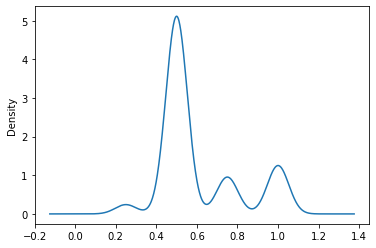

In [136]:
#data.loc[data.Energy_kWh > 3,'Energy_kWh'].plot.density()
data.loc[data.Energy_kWh > 3,'measure'].plot.density()

In [14]:
data_test = pd.read_csv(r'./charge0322_hourly_with_Covid.csv')

<AxesSubplot:ylabel='Density'>

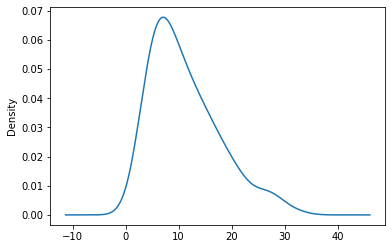

In [5]:
data_test.loc[data_test.Energy_kWh > 3, 'Energy_kWh'].plot.density()

## training set

In [6]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21,30.0,1.00,4.213925,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.546100,4.213925,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.546100,4.213925
4,2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.546100
...,...,...,...,...,...,...,...,...,...,...,...,...
10030,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10031,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10032,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10033,2022-02-01 00:00:00,0.000000,1,0,NaN,False,0.93,15.0,0.25,0.000000,0.000000,0.000000


In [7]:
data['Energy_kWh_1'] = data['Energy_kWh'].shift(-1)
data['Energy_kWh_2'] = data['Energy_kWh'].shift(-2)
data['Energy_kWh_3'] = data['Energy_kWh'].shift(-3)
data['Energy_kWh_4'] = data['Energy_kWh'].shift(-4)
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN,0.546100,0.000000,0.000000,0.005967
1,2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21,30.0,1.00,4.213925,NaN,NaN,0.000000,0.000000,0.005967,0.000000
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.546100,4.213925,NaN,0.000000,0.005967,0.000000,0.000000
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.546100,4.213925,0.005967,0.000000,0.000000,0.000000
4,2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.546100,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10031,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10032,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
10033,2022-02-01 00:00:00,0.000000,1,0,NaN,False,0.93,15.0,0.25,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
data = data.iloc[3:10031]
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.546100,4.213925,0.005967,0.0,0.0,0.0
4,2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.546100,0.000000,0.0,0.0,0.0
5,2020-12-02 14:00:00,0.000000,2,14,NaN,False,1.21,30.0,1.00,0.005967,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,2020-12-02 15:00:00,0.000000,2,15,NaN,False,1.21,30.0,1.00,0.000000,0.005967,0.000000,0.000000,0.0,0.0,0.0
7,2020-12-02 16:00:00,0.000000,2,16,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.005967,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10026,2022-01-31 17:00:00,0.000000,0,17,NaN,False,0.96,20.0,0.25,0.770908,3.509275,3.331233,0.000000,0.0,0.0,0.0
10027,2022-01-31 18:00:00,0.000000,0,18,NaN,False,0.96,20.0,0.25,0.000000,0.770908,3.509275,0.000000,0.0,0.0,0.0
10028,2022-01-31 19:00:00,0.000000,0,19,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.770908,0.000000,0.0,0.0,0.0
10029,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [9]:
data.reset_index(inplace=True)

In [10]:
df = data.drop(['index', 'hols', 'Time'], axis=1)
df.loc[:, 'measure'] = data['measure']*4
df.loc[:, 'measure'] = df['measure'].astype(int)
df

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,0.000000,2,12,False,1.21,30.0,4,0.000000,0.546100,4.213925,0.005967,0.0,0.0,0.0
1,0.005967,2,13,False,1.21,30.0,4,0.000000,0.000000,0.546100,0.000000,0.0,0.0,0.0
2,0.000000,2,14,False,1.21,30.0,4,0.005967,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,2,15,False,1.21,30.0,4,0.000000,0.005967,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,2,16,False,1.21,30.0,4,0.000000,0.000000,0.005967,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,0.000000,0,17,False,0.96,20.0,1,0.770908,3.509275,3.331233,0.000000,0.0,0.0,0.0
10024,0.000000,0,18,False,0.96,20.0,1,0.000000,0.770908,3.509275,0.000000,0.0,0.0,0.0
10025,0.000000,0,19,False,0.96,20.0,1,0.000000,0.000000,0.770908,0.000000,0.0,0.0,0.0
10026,0.000000,0,20,False,0.96,20.0,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


<AxesSubplot:>

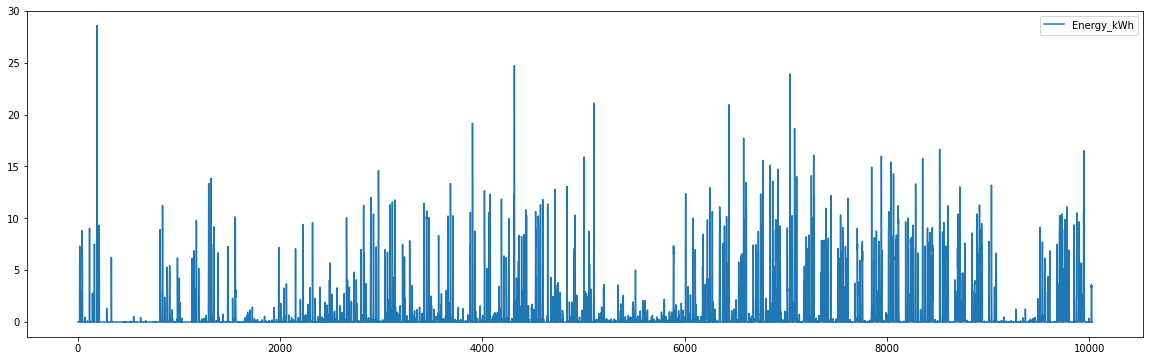

In [167]:
sample = df[['Energy_kWh']].copy()
#sample.loc[sample.Energy_kWh > 6,'Energy_kWh'] = 0
sample.plot(figsize=(20,6))
#sample

In [154]:
df.loc[df.Energy_kWh > 3, 'hour'].unique()

array([ 8,  9, 15, 10, 11, 13, 12, 14,  6,  7, 18, 16, 17,  5, 19])

## test set

In [15]:
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2022-02-01 08:00:00,20.373633,1,8,NaN,False,0.930,15.0,0.25,13.420700,3.330950,0.000000
1,2022-02-01 09:00:00,13.782533,1,9,NaN,False,0.930,15.0,0.25,20.373633,13.420700,3.330950
2,2022-02-01 10:00:00,6.048033,1,10,NaN,False,0.930,15.0,0.25,13.782533,20.373633,13.420700
3,2022-02-01 11:00:00,11.972108,1,11,NaN,False,0.930,15.0,0.25,6.048033,13.782533,20.373633
4,2022-02-01 12:00:00,7.439792,1,12,NaN,False,0.930,15.0,0.25,11.972108,6.048033,13.782533
...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.003983
661,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
662,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
663,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000


In [16]:
data_test['Energy_kWh_1'] = data_test['Energy_kWh'].shift(-1)
data_test['Energy_kWh_2'] = data_test['Energy_kWh'].shift(-2)
data_test['Energy_kWh_3'] = data_test['Energy_kWh'].shift(-3)
data_test['Energy_kWh_4'] = data_test['Energy_kWh'].shift(-4)
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-02-01 08:00:00,20.373633,1,8,NaN,False,0.930,15.0,0.25,13.420700,3.330950,0.000000,13.782533,6.048033,11.972108,7.439792
1,2022-02-01 09:00:00,13.782533,1,9,NaN,False,0.930,15.0,0.25,20.373633,13.420700,3.330950,6.048033,11.972108,7.439792,4.698083
2,2022-02-01 10:00:00,6.048033,1,10,NaN,False,0.930,15.0,0.25,13.782533,20.373633,13.420700,11.972108,7.439792,4.698083,7.002833
3,2022-02-01 11:00:00,11.972108,1,11,NaN,False,0.930,15.0,0.25,6.048033,13.782533,20.373633,7.439792,4.698083,7.002833,6.782258
4,2022-02-01 12:00:00,7.439792,1,12,NaN,False,0.930,15.0,0.25,11.972108,6.048033,13.782533,4.698083,7.002833,6.782258,1.040808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.003983,0.000000,0.000000,0.000000,0.000000
661,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
662,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
663,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [17]:
data_test = data_test.iloc[:-4]
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-02-01 08:00:00,20.373633,1,8,NaN,False,0.930,15.0,0.25,13.420700,3.330950,0.000000,13.782533,6.048033,11.972108,7.439792
1,2022-02-01 09:00:00,13.782533,1,9,NaN,False,0.930,15.0,0.25,20.373633,13.420700,3.330950,6.048033,11.972108,7.439792,4.698083
2,2022-02-01 10:00:00,6.048033,1,10,NaN,False,0.930,15.0,0.25,13.782533,20.373633,13.420700,11.972108,7.439792,4.698083,7.002833
3,2022-02-01 11:00:00,11.972108,1,11,NaN,False,0.930,15.0,0.25,6.048033,13.782533,20.373633,7.439792,4.698083,7.002833,6.782258
4,2022-02-01 12:00:00,7.439792,1,12,NaN,False,0.930,15.0,0.25,11.972108,6.048033,13.782533,4.698083,7.002833,6.782258,1.040808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,2022-02-28 16:00:00,0.000000,0,16,Spring holiday,True,1.265,10.0,0.25,0.084950,0.000000,0.848958,0.003983,0.000000,0.000000,0.000000
657,2022-02-28 17:00:00,0.003983,0,17,Spring holiday,True,1.265,10.0,0.25,0.000000,0.084950,0.000000,0.000000,0.000000,0.000000,0.000000
658,2022-02-28 18:00:00,0.000000,0,18,Spring holiday,True,1.265,10.0,0.25,0.003983,0.000000,0.084950,0.000000,0.000000,0.000000,0.000000
659,2022-02-28 19:00:00,0.000000,0,19,Spring holiday,True,1.265,10.0,0.25,0.000000,0.003983,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
df_test = data_test.drop(['hols', 'Time'], axis=1)
df_test.loc[:, 'measure'] = data_test['measure']*4
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)
df_test

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,20.373633,1,8,False,0.930,15.0,1,13.420700,3.330950,0.000000,13.782533,6.048033,11.972108,7.439792
1,13.782533,1,9,False,0.930,15.0,1,20.373633,13.420700,3.330950,6.048033,11.972108,7.439792,4.698083
2,6.048033,1,10,False,0.930,15.0,1,13.782533,20.373633,13.420700,11.972108,7.439792,4.698083,7.002833
3,11.972108,1,11,False,0.930,15.0,1,6.048033,13.782533,20.373633,7.439792,4.698083,7.002833,6.782258
4,7.439792,1,12,False,0.930,15.0,1,11.972108,6.048033,13.782533,4.698083,7.002833,6.782258,1.040808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.000000,0,16,True,1.265,10.0,1,0.084950,0.000000,0.848958,0.003983,0.000000,0.000000,0.000000
657,0.003983,0,17,True,1.265,10.0,1,0.000000,0.084950,0.000000,0.000000,0.000000,0.000000,0.000000
658,0.000000,0,18,True,1.265,10.0,1,0.003983,0.000000,0.084950,0.000000,0.000000,0.000000,0.000000
659,0.000000,0,19,True,1.265,10.0,1,0.000000,0.003983,0.000000,0.000000,0.000000,0.000000,0.000000


# Multi-point forecasting model based on fastai Tabular Learner (FNN)

In [82]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = F.mse_loss(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = torch.sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score


In [22]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [23]:
cont_df

['R', 'IC_number', 'E_1', 'E_2', 'E_3']

In [24]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [28]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_nn = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [29]:
dls = to_nn.dataloaders(150)

In [30]:
from fastai.tabular.all import*

In [88]:
learn = tabular_learner(dls, wd=0.02, y_range=(0, 36), layers=[1000,500], n_out=5, loss_func=multiPointLoss, metrics=rmse)

SuggestedLRs(valley=0.001737800776027143)

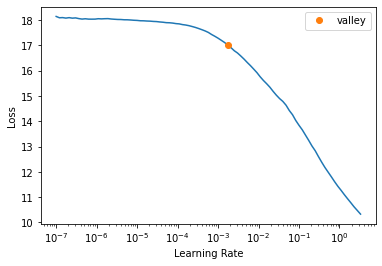

In [89]:
learn.lr_find()

In [90]:
learn.fine_tune(25, 2e-3)

epoch,train_loss,valid_loss,_rmse,time
0,12.964573,9.409359,9.462423,00:03


epoch,train_loss,valid_loss,_rmse,time
0,9.148949,8.286247,8.321939,00:03
1,8.574574,7.774086,7.810198,00:03
2,8.054597,7.005296,7.048679,00:03
3,7.588170,6.873748,6.911124,00:03
4,7.201848,6.033217,6.073772,00:02
5,5.849720,3.647901,3.715264,00:03
6,3.655225,2.170918,2.183874,00:02
7,2.616466,2.165977,2.180829,00:03
8,2.228286,2.107700,2.121289,00:02
9,2.136267,2.147306,2.161644,00:03


In [91]:
learn.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=27, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=5, bias=True)
    )
    (3): SigmoidRange(low=0, high=36)
  )
)

In [94]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [95]:
procs_nn = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_nn, cat_df_test, cont_df_test, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [96]:
dls_test = to_test.dataloaders()

In [97]:
preds,targs = learn.get_preds(dl=dls_test[0])

In [101]:
preds.shape

torch.Size([661, 5])

In [102]:
preds.shape

torch.Size([661, 5])

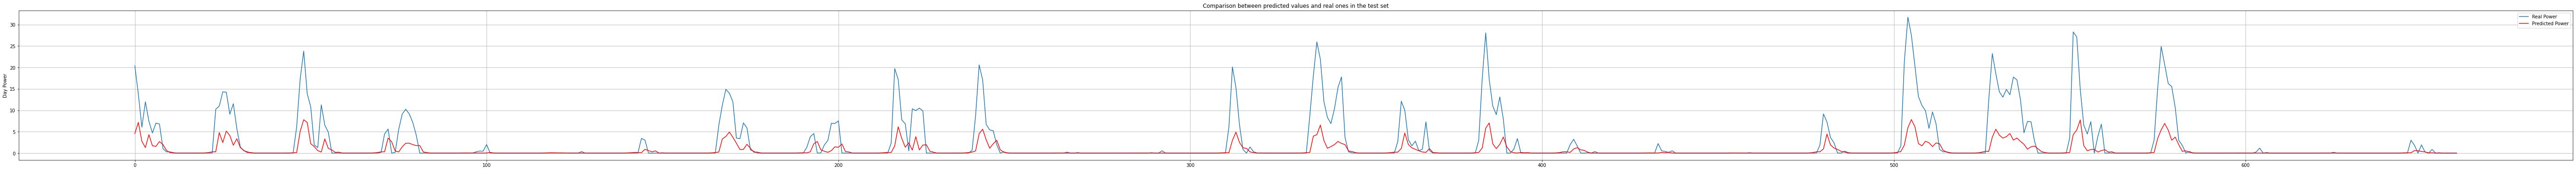

In [113]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

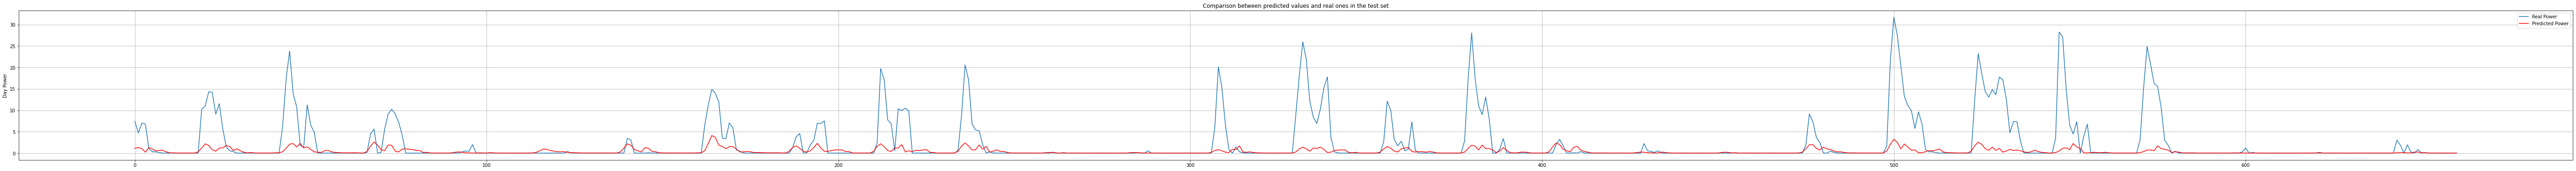

In [111]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,4])
plt.plot(range(len(preds)), preds[:,4], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [118]:
preds,targs = learn.get_preds()

In [121]:
dls.valid.items

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
8886,4.980233,3,9,1,-0.525968,0.742719,2,2.00832,-0.304564,-0.307409,4.980233,10.420167,6.688941,0.750350
7450,0.007933,5,17,1,0.988374,-0.915391,2,-0.30560,-0.291872,-0.205153,0.000000,0.000000,0.000000,0.000000
8960,0.071125,6,11,1,-0.230487,-0.027118,2,-0.30560,-0.304564,-0.307409,0.000000,0.000000,0.000000,0.000000
9362,0.000000,2,5,2,0.138865,-0.737736,2,-0.30560,-0.304564,-0.307409,0.000000,0.141067,0.141067,1.249567
3102,0.000000,3,24,1,-0.045811,1.630992,4,-0.30560,-0.304564,-0.307409,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,0.000000,7,1,1,0.286606,-1.033827,2,-0.30560,-0.304564,-0.307409,0.000000,0.000000,0.000000,0.000000
4977,0.018358,7,5,1,4.681894,-1.507573,2,-0.30560,-0.304564,-0.307409,0.000000,0.000000,0.000000,0.000000
4091,0.000000,5,7,1,-0.784515,-0.619300,3,-0.30560,-0.304564,-0.304952,0.205033,0.000000,0.000000,0.000000
6005,0.000000,1,5,1,-0.119681,-0.915391,3,-0.30560,-0.304564,-0.307409,0.026675,8.360450,10.698825,12.367158


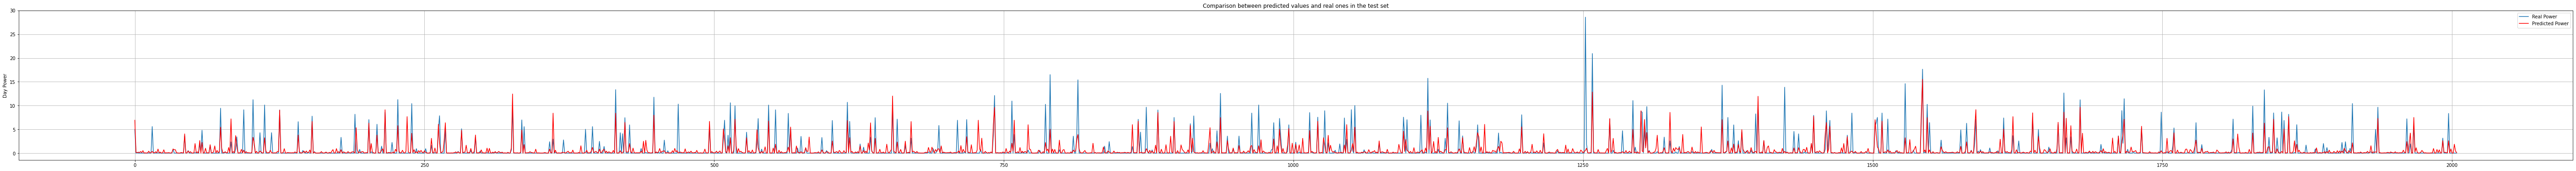

In [122]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()